## Modulation: ASK/OOK

Amplitude Shift Keying (ASK) is a simple and effective modulation technique where the amplitude of a carrier wave is varied in accordance with the digital data being transmitted. In its most basic form, On-Off Keying (OOK), the presence of the carrier wave represents a binary '1', while its absence represents a binary '0'. This straightforward method makes ASK/OOK particularly attractive for applications requiring low complexity and minimal power consumption, such as remote controls, simple radio frequency (RF) communications, and optical communication systems.

The process begins with a continuous sinusoidal carrier signal, whose amplitude is modulated by a digital signal—often a simple sequence of ones and zeros. When a '1' is to be transmitted, the full amplitude of the carrier is maintained, and when a '0' is transmitted, the carrier is either significantly reduced in amplitude or completely turned off. This creates a signal that is easy to generate and decode using basic circuitry.

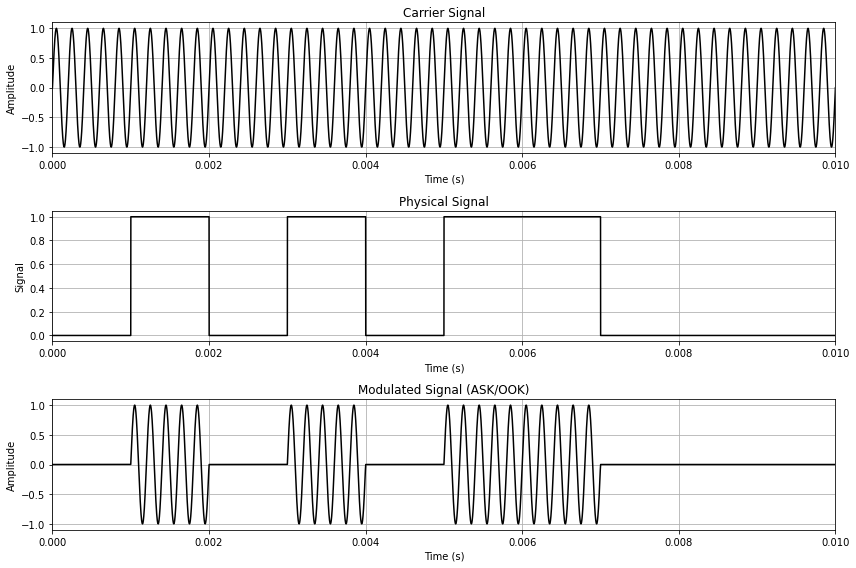

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# carrier frequency (Hz)
f_carrier = 5e3 # 5 kHz

# sampling rate (samples per second)
fs = 1e8

# start time (s)
t0 = 0

# end time (s)
t1 = 0.01

# amplitudes for logical 0 and logical 1
amplitudes = [0, 1] # OOK modulation
# amplitudes = [0.1, 2] # ASK modulation

logical_signal = [0, 1, 0, 1, 0, 1, 1, 0] # the logical signal to be transmitted
baudrate = 1000 # symbol rate (symbols per second)

# time vector
t = np.linspace(t0, t1, int(((t1-t0)*fs)), endpoint=False)

# generate the carrier signal as a sine wave
carrier = np.sin(2 * np.pi * f_carrier * t)

# generate the pyhsical signal
pysical_signal = np.zeros(len(t))
for i, bit in enumerate(logical_signal):
    pysical_signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)] = amplitudes[bit]

# modulate the signal
modulated_signal = carrier * pysical_signal

# plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, carrier, color='black')
plt.title("Carrier Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.subplot(3, 1, 2)
plt.plot(t, pysical_signal, color='black')
plt.title("Physical Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.grid()
plt.xlim(t0, t1)

plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal, color='black')
plt.title("Modulated Signal (ASK/OOK)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.tight_layout()
plt.show()

When the signal is affected by noise, the clarity of the amplitude levels can diminish significantly. In ASK/OOK modulation, where the digital information relies on the presence or absence of the carrier wave, even minor fluctuations may lead to incorrect interpretation of data bits.

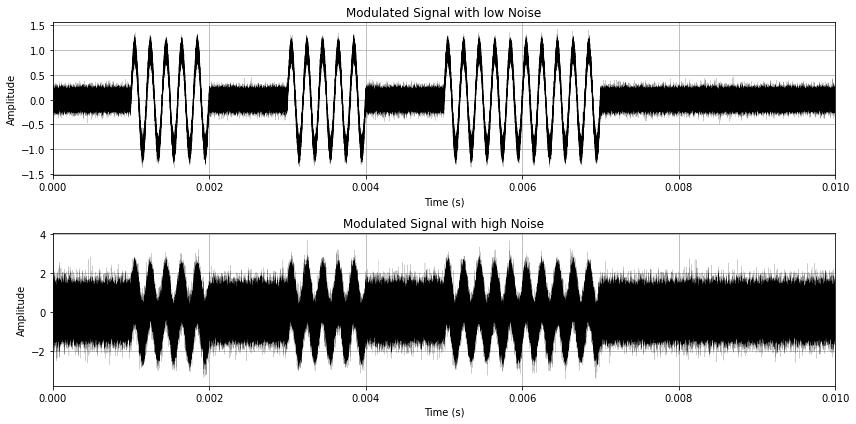

In [2]:
low_noise = np.random.normal(0, 0.1, modulated_signal.shape)
high_noise = np.random.normal(0, 0.6, modulated_signal.shape)
modulated_signal_low_noisy = modulated_signal + low_noise
modulated_signal_high_noisy = modulated_signal + high_noise

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, modulated_signal_low_noisy, color='black', linewidth=0.1)
plt.title("Modulated Signal with low Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.subplot(2, 1, 2)
plt.plot(t, modulated_signal_high_noisy, color='black', linewidth=0.1)
plt.title("Modulated Signal with high Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.tight_layout()
plt.show()

In a waterfall diagram, the signal is displayed as a time-varying spectrum with frequency components color-coded by intensity. For ASK/OOK modulation, you typically see a dominant carrier frequency that appears and disappears according to the modulation, creating a distinctive pattern over time.

Note: In the following diagrams we use a new Signal at 433.92 MHz

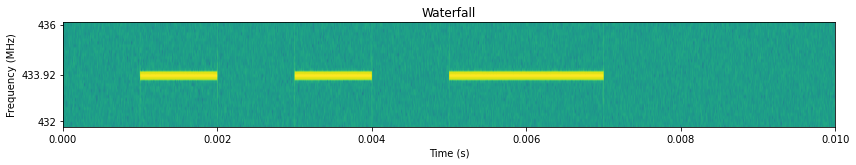

In [3]:
# carrier frequency (Hz)
f_carrier = 433.92e6 # 433.92 kHz

# sampling rate (samples per second)
fs = 1e9

# start time (s)
t0 = 0

# end time (s)
t1 = 0.01

# amplitudes for logical 0 and logical 1
amplitudes = [0, 1] # OOK modulation
# amplitudes = [0.1, 1] # ASK modulation

logical_signal = [0, 1, 0, 1, 0, 1, 1, 0] # the logical signal to be transmitted
baudrate = 1000 # symbol rate (symbols per second)

# time vector
t = np.linspace(t0, t1, int(((t1-t0)*fs)), endpoint=False)

# generate the carrier signal as a sine wave
carrier = np.sin(2 * np.pi * f_carrier * t)

# generate the pyhsical signal
pysical_signal = np.zeros(len(t))
for i, bit in enumerate(logical_signal):
    pysical_signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)] = amplitudes[bit]

# modulate the signal
modulated_signal = carrier * pysical_signal

noise = np.random.normal(0, 0.1, modulated_signal.shape)
modulated_signal_noisy = modulated_signal + noise

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.specgram(modulated_signal_noisy, Fs=fs, NFFT=8096, noverlap=4096, cmap='viridis')
plt.title("Waterfall")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (MHz)")
plt.xlim(t0, t1)
plt.ylim(0.995*f_carrier, 1.005*f_carrier)
plt.yticks([432e6, f_carrier, 436e6], ["432", f"{f_carrier/1e6:.2f}", "436"])
plt.tight_layout()
plt.show()

To recover the logical signal from the physical, noisy signal, we first downconvert it by mixing with a complex exponential. This process shifts the carrier frequency down to baseband, revealing the underlying modulated data along with an image component due to the symmetry of the real-valued signal. Applying a low-pass filter then isolates the desired baseband signal, enabling the extraction of the original digital information.

c:\Users\tobia\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\tobia\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


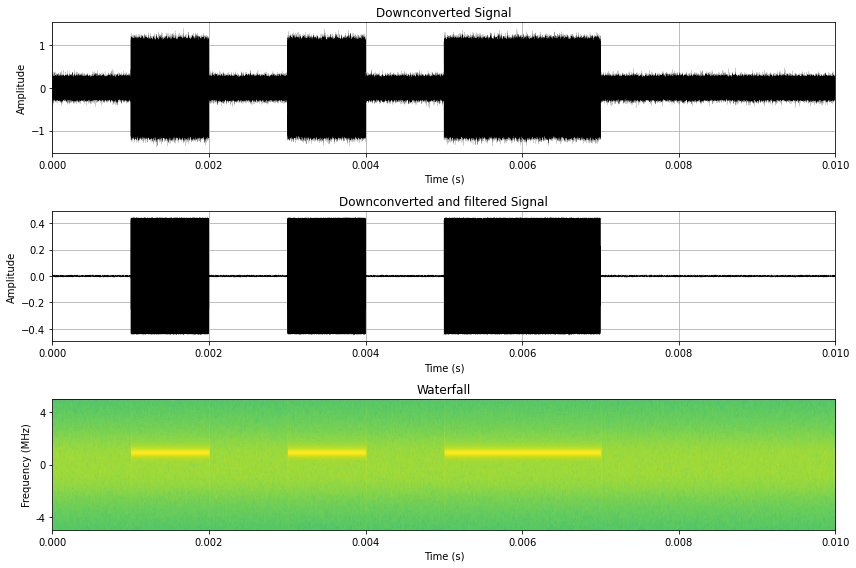

In [4]:
import numpy as np
from scipy.signal import butter, filtfilt

# to get a more realistic example, the carrier frequency is a bit off
demod_carrier = np.exp(-1j * 2 * np.pi * 433e6 * t)

demodulated_signal = modulated_signal_noisy * demod_carrier

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, demodulated_signal, color='black', linewidth=0.1)
plt.title("Downconverted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

cutoff = 1500e3      # Cutoff-Freqency 
order = 2            # Filter Order
nyq = 0.5 * fs       # Nyquist-Frequency
normal_cutoff = cutoff / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)
filtered_signal = filtfilt(b, a, demodulated_signal)

plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal, color='black', linewidth=0.1)
plt.title("Downconverted and filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.subplot(3, 1, 3)
plt.specgram(filtered_signal, Fs=fs, NFFT=8096, noverlap=4096, cmap='viridis')
plt.title("Waterfall")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (MHz)")
plt.xlim(t0, t1)
plt.ylim(-5e6, 5e6)
plt.yticks([-4e6,0,4e6], [-4,0,4])

plt.tight_layout()
plt.show()

If you calculate the Magnitude, you get your original, logical signal back:

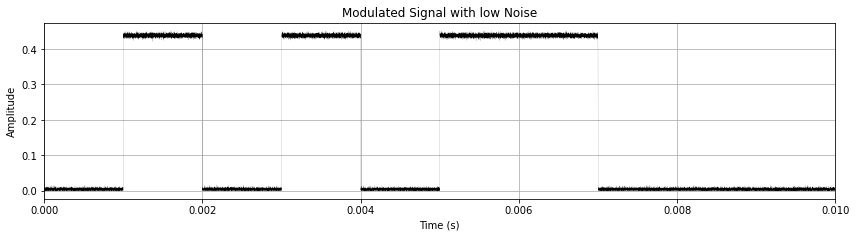

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, np.abs(filtered_signal), color='black', linewidth=0.1)
plt.title("Modulated Signal with low Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(t0, t1)

plt.tight_layout()
plt.show()